# Divisibility by 3

Given an infinite stream of digits of a number, for each digit find if the resuktant number is divible by 3 or not.

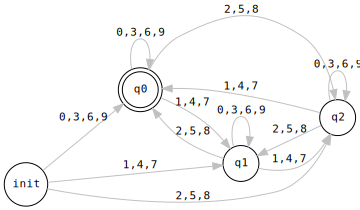

In [1]:
from graphviz import Source
with open("asset/div3.dot", "r") as f:
    gr = Source(f.read())
gr

In [2]:
def prime(fn):
    def wrapper(*args, **kwargs):
        v = fn(*args, **kwargs)
        v.send(None)
        return v
    return wrapper

In [3]:
class Divisibility3FSM:
    def __init__(self):
        self.init = self._create_init()
        self.q0 = self._create_q0()
        self.q1 = self._create_q1()
        self.q2 = self._create_q2()
        
        self.current_state = self.init
        
    def send(self, digit):
        self.current_state.send(digit)
        
    def is_divisible(self):
        return self.current_state == self.q0

    @prime
    def _create_q0(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.q0
            elif  digit in [1, 4, 7]:
                self.current_state = self.q1
            elif  digit in [2, 5, 8]:
                self.current_state = self.q2

    @prime
    def _create_q1(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.q1
            elif  digit in [1, 4, 7]:
                self.current_state = self.q2
            elif  digit in [2, 5, 8]:
                self.current_state = self.q0

    @prime
    def _create_q2(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.q2
            elif  digit in [1, 4, 7]:
                self.current_state = self.q0
            elif  digit in [2, 5, 8]:
                self.current_state = self.q1

    @prime
    def _create_init(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.q0
            elif  digit in [1, 4, 7]:
                self.current_state = self.q1
            elif  digit in [2, 5, 8]:
                self.current_state = self.q2

In [4]:
import random

number = ""
evaluator = Divisibility3FSM()
for i in range(50):
    digit = random.randint(0, 9)
    number = str(digit) + number
    evaluator.send(digit)
    print(number, evaluator.is_divisible())

4 False
54 True
154 False
7154 False
87154 False
687154 False
1687154 False
21687154 False
121687154 False
6121687154 False
06121687154 False
406121687154 True
9406121687154 True
69406121687154 True
269406121687154 False
1269406121687154 True
31269406121687154 True
731269406121687154 False
0731269406121687154 False
80731269406121687154 True
580731269406121687154 False
4580731269406121687154 True
44580731269406121687154 False
144580731269406121687154 False
8144580731269406121687154 False
08144580731269406121687154 False
008144580731269406121687154 False
6008144580731269406121687154 False
16008144580731269406121687154 False
016008144580731269406121687154 False
2016008144580731269406121687154 False
92016008144580731269406121687154 False
092016008144580731269406121687154 False
0092016008144580731269406121687154 False
80092016008144580731269406121687154 True
280092016008144580731269406121687154 False
2280092016008144580731269406121687154 False
72280092016008144580731269406121687154 False
27